This is the ducomentation of learning sicilearn package from python. To better prepare myself for data science interviews about certain algorithms and python programming. The goal is to first try out all the examples, and browse through the algorithms for regression, classification, clustering. Then, spend a few days learning about the ensemble methods. All these should be done before Jan.

# Generalized Linear Models
This is following the section about linear models. Try all the code, and play around with the examples in this section.

## Linear Regression Models
For a general linear regression model, the general assumption is that
$$ y = w^{T}x+\epsilon $$
Where, in general, the $x$ are independent variables. The error from prediction $\epsilon$ is uaually assumed to be gaussian with expectation 0. To find the best prediction, or approximation of the parameters $w$ from data $X,Y$, we aim at minimizing the error
$$ \hat{w} = argmin_{w} || wX - Y ||^2 $$
This minimization problem can be either solved analytically, or solved with an optimization sub-routine. The analytical formulation would require an inverse of a matrix. But it is usually of low rank.
$$ f =(w^T x - y)^2 $$
The derivative of this function would be
$$ \frac{ \partial f }{\partial w } = x^T (w^T x - y) $$
Setting the derivative to be zero, we would get the optimal solution of $w$, which is given by\
$$ x^T(x w - y) = 0 $$
This will give the solution to be
$$ \hat{w} = (x^Tx)^{-1}y $$
The matrix $x$ is the design matrix. If the parameter $w$ is a $d$-dimensional vector. Then the matrix $x^tx$ is a $d\times d$ matrix. This inverse problem would not be so bad. But if the $w$ is a huge vector, then we would probably need to figure out something else. 
In evaluating the solution, the bottle neck would be the inverse of the $d\times d$ matrix. Which usually costs $d^3$ computations.
But, the singular value decomposition method of inversing the matrix would give $d^2$ cost. Meaning, the final computation would be $nd^2$, where the $n$ comes from the $y$ vector.

## Linear Regression Example
This example is taken from the sclearn documentation

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

diabetes = datasets.load_diabetes()

diabetes_X = diabetes.data[:,np.newaxis,2]
len(diabetes_X)
diabetes_X_train = diabetes_X[:-20]
len(diabetes_X_train)
diabetes_X_test = diabetes_X[-20:]

diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

regr = linear_model.LinearRegression()

regr.fit(diabetes_X_train, diabetes_y_train)

print('Coefficients:\n',regr.coef_)


Coefficients:
 [ 938.23786125]


After finishing the computation, we do some simple visualization of the data and the regression result.

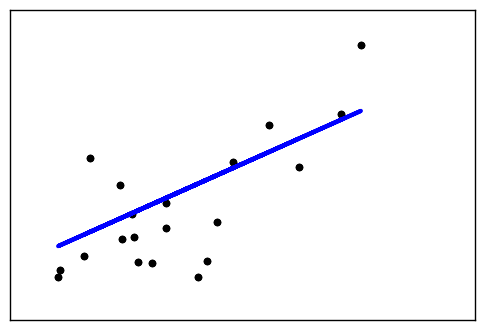

In [10]:
plt.scatter(diabetes_X_test,diabetes_y_test,color='black')
plt.plot(diabetes_X_test,regr.predict(diabetes_X_test),color='blue',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

The regression object contains methods to run regressions, make predictions. it should certainly contain methods to compute the necessary statistics. We can dig into that later on. But the syntax, methods, usage seems simple and pretty enough. Maybe later I should consider using python as my daily language instead of R.

## Ridge Regression
Ridge regression could be viewed as a MAP treatment with a gaussian prior posed on the parameters. The motivation is to impose a 2-norm constraints on the parameters.
$$ min ||xw-y||^2 + \alpha ||w||^2_2 $$
This will make all components smaller, and distribute the variance across evenly. The 2 norm function is differentiable, that's why we can still find analytical solution to this minimization problem
$$ x^t(xw-y)+2\alpha w = 0  $$
The solution will be
$$ w = (x^tx+\alpha)^{-1}x^ty $$
This constraints will make the inverse easier by adding diagonal elements. The conditional number of this matrix would generally be smaller, making computations a more stable process. Because we have an anlytical solution, the computational complexity of ridge regression will be the same as the usual linear regression.

## Ridge Regression Example
This example is from the scikitlearn documentation

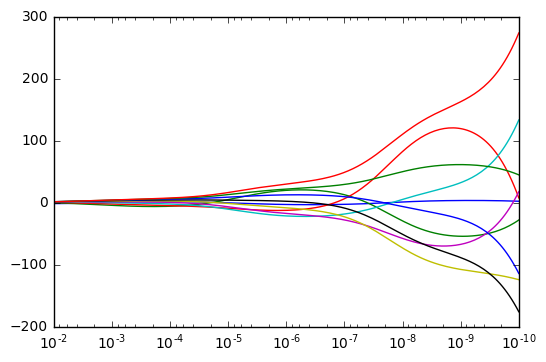

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
x = 1./(np.arange(1,11)+np.arange(0,10)[:,np.newaxis])
y = np.ones(10)
n_alphas = 200
alphas = np.logspace(-10,-2,n_alphas)
clf = linear_model.Ridge(fit_intercept=False)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(x,y)
    coefs.append(clf.coef_)
    
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

We can clearly see from the above figure, that when $\alpha$ is large, the value of the parameters is restricted to be very small. As $\alpha$ gets smaller, the parameter values is allowed to fluctuate.

## Lasso Regression
Lasso regression is imposing a 1 norm regularizor on the parameters. It aims at discovering sparse parameters. Since the 1 norm is a convex relaxation of sparsity constraints, also, intuitively, the corner points indeed provide sparse solutions. In image reconstruction, de-blurring, we often see the usage of this method. We might very well expect this to work in any kind of sparse recovery problems. The objective function is this method is
$$ \alpha ||w||_1 + ||xw-y|| $$

The implementation of lasso regression in the class Lasso uses coordinate descent. Which is minimization w.r.t each individual component iteratively until convergence is reached. There is no definite answer to computational complexity.

## Lasso Example
This example is taken from the official documentation. We simulate a sparse data corrupted by noise, and try to recover it through lasso regression.

/home/gwsun/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/gwsun/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


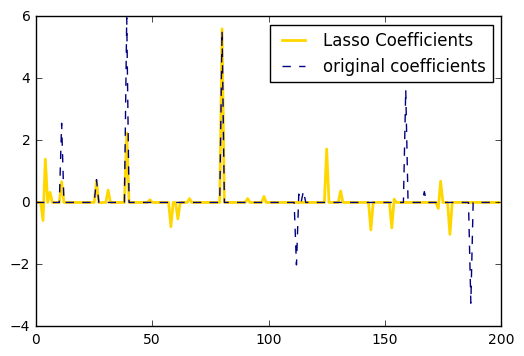

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

np.random.seed(42)
n_samples,n_features = 50, 200
x = np.random.randn(n_samples,n_features)
coef = 3*np.random.randn(n_features)
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]] = 0 # make some sparse by setting them to be zero
y = np.dot(x,coef)  # generate the response, or linear model
y+= 0.01*np.random.normal((n_samples,))

alpha = 0.1
x_train,y_train = x[:n_samples/2],y[:n_samples/2]
x_test, y_test = x[n_samples/2:],y[n_samples/2:]
lasso =Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(x_train,y_train).predict(x_test)
r2_score_lasso = r2_score(y_test,y_pred_lasso)
print(lasso)

plt.plot(lasso.coef_,color='gold',linewidth=2,label="Lasso Coefficients")
plt.plot(coef,'--',color='navy',label='original coefficients')
plt.legend(loc='best')
plt.show()


In general, we could have more problems of similar forms. Like the netflix problem, or multi-task lasso. In these cases, certain regularizor could be the form of Frobius norm on matrix of parameters. Please refer to our advanced optimization course lecture notes for more details.

 Finishing up this section, we run into the problem of choosing between lasso, ridge, elasticnet and lar regression methods. Apparently LAR, the least angle regression, is more recent, and provides a fast computation method for choosing models.It is definitely worth looking at.

## Orthogonal Matching
This is also a model selection, or sparse recovery method. It is a greedy algorithm. In each step, one atom feature with the maximium correlation with the unexplained data is selected. Then, with selected data, we calculate the residual using projection into the unexplained space. Doing this recersively, until we reach the constraint of number of non-zero feature vectors. The imposed regularizer is not-differentiable, therefore, there is no decent method provided on this problem.

100
100
100
17


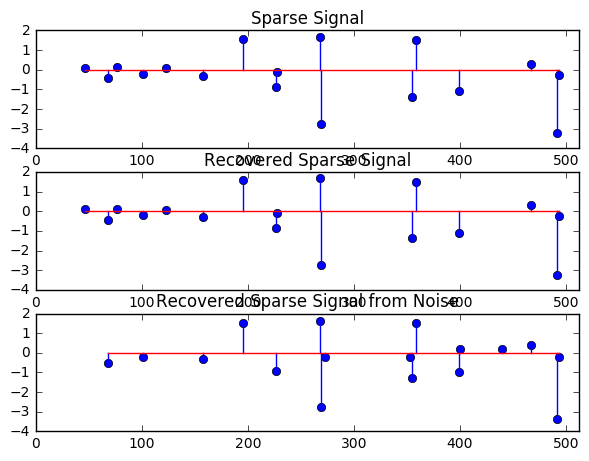

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.datasets import make_sparse_coded_signal
n_components, n_features = 512, 100
n_nonzero_coefs = 17

y,X,w = make_sparse_coded_signal(n_samples =1, 
                                 n_components=n_components,
                                 n_features=n_features,
                                 n_nonzero_coefs=n_nonzero_coefs,
                                 random_state=0)

idx, = w.nonzero()

y_noisy = y+0.05*np.random.randn(len(y))

plt.close('all')

plt.figure(figsize=(7,7))
plt.subplot(4,1,1)
plt.xlim(0,512)
plt.title('Sparse Signal')
plt.stem(idx,w[idx])

omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp.fit(X,y)
coef=omp.coef_
idx_r,=coef.nonzero()
plt.subplot(4,1,2)
plt.xlim(0,512)
plt.title('Recovered Sparse Signal')
plt.stem(idx_r,coef[idx_r])
print(len(X))
print(len(y))
print(len(y_noisy))
print(len(idx_r))

omp.fit(X,y_noisy)
coef = omp.coef_
idx_r, = coef.nonzero()
plt.subplot(4,1,3)
plt.xlim(0,512)
plt.title('Recovered Sparse Signal from Noise')
plt.stem(idx_r,coef[idx_r])
plt.show()


## Bayesian Regression
This train of thought is to introduce a certain prior on the parameters, which will appear as regulation terms later on. For instance, a spherical gaussian prior will give the ridge regression, where the variance of the spherical gaussian prior corresponds to the regulation parameter $\alpha$. A spherical laplacian prior will correspond to the lasso regression. 
For sparse recovery problems, the Automatic Relevance Determination is also useful. Where the gaussian prior is assumed to be axis-parallel. Meaning each component would have a independent gaussian distribution. We try the example for this method.

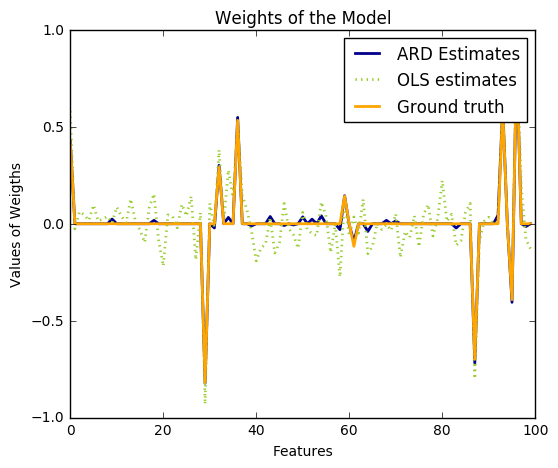

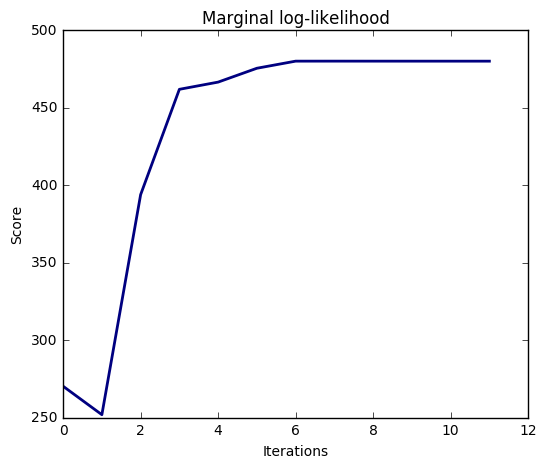

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import ARDRegression, LinearRegression

np.random.seed(2016)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples,n_features)
lambda_ = 4
w = np.zeros(n_features)
relevant_features = np.random.randint(0,n_features,10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0,scale=1./np.sqrt(lambda_))
    
alpha_ = 50
noise = stats.norm.rvs(loc=0,scale=1./np.sqrt(alpha_),size=n_samples)
y = np.dot(X,w)+noise

clf = ARDRegression(compute_score=True)
clf.fit(X,y)
ols=LinearRegression()
ols.fit(X,y)

plt.figure(figsize=(6,5))
plt.title("Weights of the Model")
plt.plot(clf.coef_,color='darkblue',linestyle='-',linewidth=2,label='ARD Estimates')
plt.plot(ols.coef_,color='yellowgreen',linestyle=':',linewidth=2,label='OLS estimates')
plt.plot(w,color='orange',linestyle='-',linewidth=2,label='Ground truth')
plt.xlabel('Features')
plt.ylabel('Values of Weigths')
plt.legend(loc=1)

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=2)
plt.ylabel("Score")
plt.xlabel("Iterations")
plt.show()

## Logistic Regression
Logit or Logistic regression is for predicting binary outcomes, with the probability of success being predicted. The assumption is as follows:
$$ p(y=1) = \frac{e^{X^T w}}{1+e^{X^Tw}}$$
Therefore, for a vector of data points $y_i, x_i$, we have the likelihood for the outcome expressed as
$$ p(Y = y) = \prod\limits_{y=1} \frac{e^{wX}}{1+e^{wX}} \prod\limits_{y=1} \frac{1}{1+e^{wX}}  $$
The goal is to maximize this likelihood given teh data $y$. We first re-write the function using $y$ to get rid of the indicator in the product
$$ \frac{e^{wX}}{1+e^{wX}} = (-1)^{y+1} [y - \frac{1}{1+e^{wX}}], y=1 $$
$$ \frac{1}{1+e^{wX}} = (-1)^y [y - \frac{1}{1+e^{wX}} ], y=1  $$
For a set of given data points, the value of $y$ can be treated as constants. Therefore, the above are a nice, differentiable function w.r.x. To maximize the likelihood, we maximize the log of the liklihood
$$ max \sum log( exp(-y_i(X_i^Tw+c)) +1 ) $$
If we like, we can also put in some regulation like l1 or l2 regulators.
This optimization problem is treated using different types of methods. For l2 estimators, the 'lbfg','sag' and 'newton-cg' are all available. But for l1 regulators, we have a coordinate descent method in the LogisticRegression class.

## Logistic Regression Example
Here, we try the one vs rest example in the scikit-learn documentation

training score: 0.995 (multinomial)
training score: 0.976 (ovr)


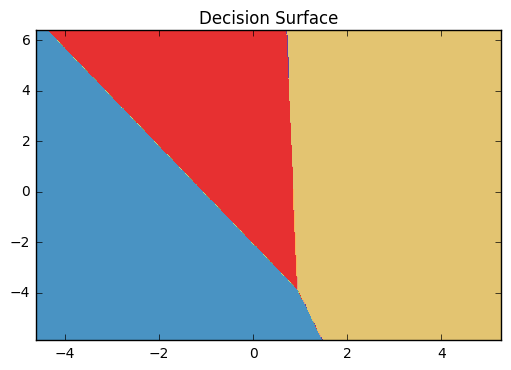

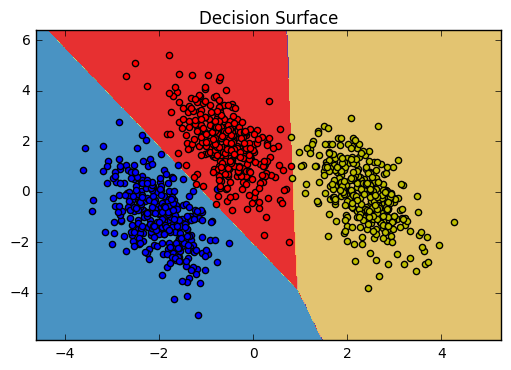

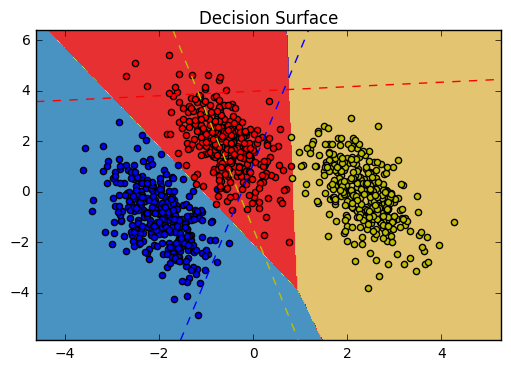

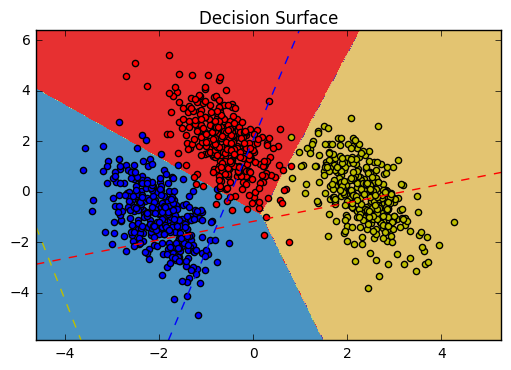

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

centers = [ [-5,0],[0,1.5],[5,-1] ]
X,y = make_blobs(n_samples=1000,centers=centers,random_state=40)
transformation = [[0.4,0.2],[-0.4,1.2]]
X = np.dot(X,transformation)

for multi_class in ('multinomial','ovr'):
    clf = LogisticRegression(solver='lbfgs',max_iter=100,random_state=42,multi_class=multi_class).fit(X,y)
    print("training score: %.3f (%s)" % (clf.score(X,y),multi_class))
    h=0.02
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx,yy,z,cmap=plt.cm.Paired)
    plt.title("Decision Surface")
    plt.axis('tight')
    
    colors='bry'
    for i, color in zip(clf.classes_,colors):
        idx = np.where(y==i)
        plt.scatter(X[idx,0],X[idx,1],c=color,cmap=plt.cm.Paired)
        
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef =clf.coef_
    intercept = clf.intercept_
    def plot_hyperplane(c,color):
        def line(x0):
            return (-(x0*coef[c,0]-intercept[c]/coef[c,1]))
        plt.plot([xmin,xmax],[line(xmin),line(xmax)], ls='--', color=color )
    
    for i, color in zip(clf.classes_,colors):
        plot_hyperplane(i,color)
        
plt.show()

# Outliers in Regression
In all above sections, we have been trying to fit a regression model, sometimes with certain constraints. Another common problem that arise in regression analysis is the existence of outliers. If there is an error in collecting the data, or in the underlying generative mechanism, certain subsets of the data points may not be well fitted into the model. There are three methods provided in scikit-learn to deal with outliers.

## RANSAC
This algorithm is intuitively straightforward. We can compute the model, and use the estimated model to put data into inliers and outliers. Iteratively continue this process until a max number or certain stopping crieria is reached. The separation between inliers or outliers are usually determined by some statistics relating to the residue between data points and estimated model.

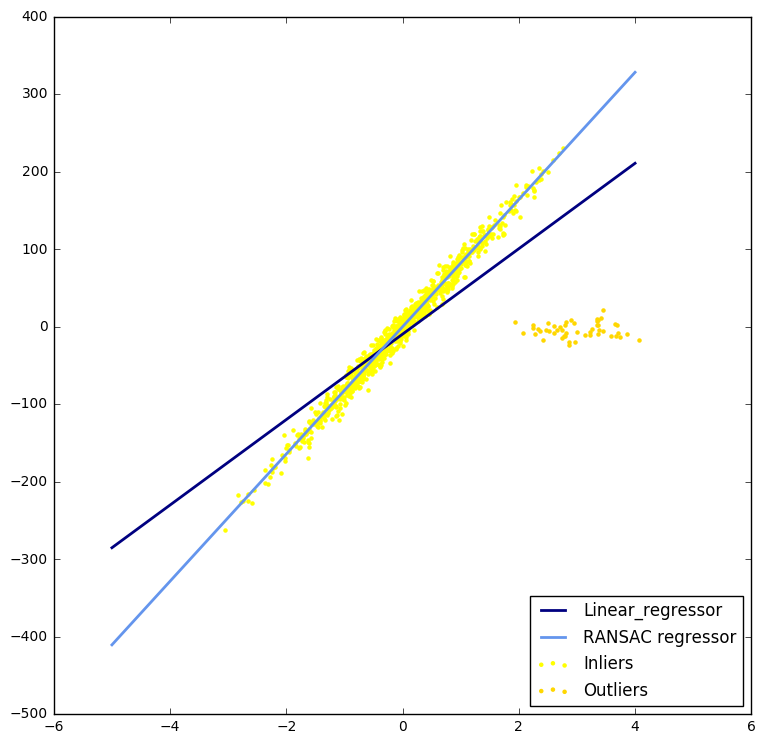

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

n_samples = 1000
n_outliers = 50

X, y ,coef =datasets.make_regression(n_samples = n_samples,
                                    n_features = 1,
                                    n_informative = 1,
                                    noise = 10,
                                    coef =True, random_state =0)


np.random.seed(2016)
X[:n_outliers] = 3+0.5*np.random.normal(size=(n_outliers,1))
y[:n_outliers] = -3 + 10*np.random.normal(size=n_outliers)

model = linear_model.LinearRegression()
model.fit(X,y)

model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(X,y)
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_x = np.arange(-5,5)
line_y = model.predict(line_x[:,np.newaxis])
line_y_ransac = model_ransac.predict(line_x[:,np.newaxis])

lw=2
plt.figure(figsize=(9,9))
plt.scatter(X[inlier_mask],y[inlier_mask],color='yellow',marker='.',label='Inliers')
plt.scatter(X[outlier_mask],y[outlier_mask],color='gold',marker='.',label='Outliers' )
plt.plot(line_x,line_y,color='navy',linestyle='-',linewidth=lw,label='Linear_regressor')
plt.plot(line_x,line_y_ransac, color ='cornflowerblue', linestyle='-',linewidth=lw,label='RANSAC regressor' )
plt.legend(loc='lower right')
plt.show()